In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error

C:\Users\Adam\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [1]:
data = pd.read_csv("Student_Performance.csv")

NameError: name 'pd' is not defined

In [4]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [5]:
#detecter les valeurs manquantes
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [7]:
data.shape

(10000, 6)

In [8]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [6]:
#La somme du nombre de doublons dans les données
data.duplicated().sum()

127

In [7]:
#supprimer les doublons
data.drop_duplicates(inplace=True)

In [8]:
data.duplicated().sum()

0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9873 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     9873 non-null   int64  
 1   Previous Scores                   9873 non-null   int64  
 2   Extracurricular Activities        9873 non-null   object 
 3   Sleep Hours                       9873 non-null   int64  
 4   Sample Question Papers Practiced  9873 non-null   int64  
 5   Performance Index                 9873 non-null   float64
dtypes: float64(1), int64(4), object(1)
memory usage: 539.9+ KB


In [17]:
data.describe(include='all')

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,9873.000000,9873.000000,9873,9873.000000,9873.000000,9873.000000
unique,NaN,NaN,2,NaN,NaN,NaN
top,NaN,NaN,No,NaN,NaN,NaN
freq,NaN,NaN,4986,NaN,NaN,NaN
mean,4.992100,69.441102,NaN,6.531652,4.583004,55.216651
std,2.589081,17.325601,NaN,1.697683,2.867202,19.208570
min,1.000000,40.000000,NaN,4.000000,0.000000,10.000000
25%,3.000000,54.000000,NaN,5.000000,2.000000,40.000000
50%,5.000000,69.000000,NaN,7.000000,5.000000,55.000000
75%,7.000000,85.000000,NaN,8.000000,7.000000,70.000000


In [18]:
numerical = data.select_dtypes(include="number")

In [ ]:
numerical = data.select_dtypes(include="number")

# Data Distribution of Numerical Features
fig = plt.figure(figsize=(25, 15))
ax_value = []

# Create subplots dynamically based on the number of numerical features
for i in range(len(numerical.columns)): 
    ax_value.append(fig.add_subplot(1, len(numerical.columns), i+1))  # Create subplot in 1 row and len(numerical) columns

    # Plot histogram and KDE for each numerical feature
    numerical.iloc[:, i].plot(kind='hist', density=True, color='red', ax=ax_value[i], bins=30)
    numerical.iloc[:, i].plot(kind='kde', color='blue', ax=ax_value[i])
    
    # Set titles and labels for each subplot
    ax_value[i].set_title(f'{numerical.columns[i]} feature distribution', fontweight='bold', pad=20)
    ax_value[i].set_xlabel(f'{numerical.columns[i]} value')
    ax_value[i].set_ylabel('Density')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

In [9]:
#La colonne 'Extracurricular Activities' du DataFrame data est transformée en variables binaires (autre column ajoute )
activities = pd.get_dummies(data['Extracurricular Activities'], drop_first=True).astype(int)

In [10]:
activities

,Yes
0,1
1,0
2,1
3,1
4,0
...,...
9995,1
9996,1
9997,1
9998,1


In [11]:
#on supprimer la column 
data=data.drop(columns=('Extracurricular Activities'))

In [12]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [13]:
#changer le nom de column Yes to activities
activities.rename(columns={'Yes':"activities"},inplace=True)

In [14]:
data = pd.concat([activities,data],axis=1)

In [26]:
data.columns

Index(['activities', 'Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

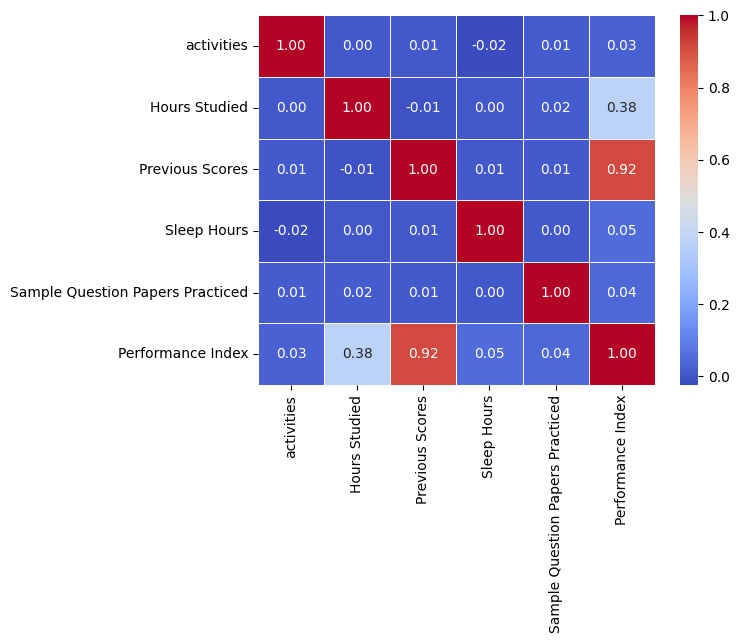

In [15]:
#la correlation entre les variables pour constate les variables qui ont un impact sur la cible
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()

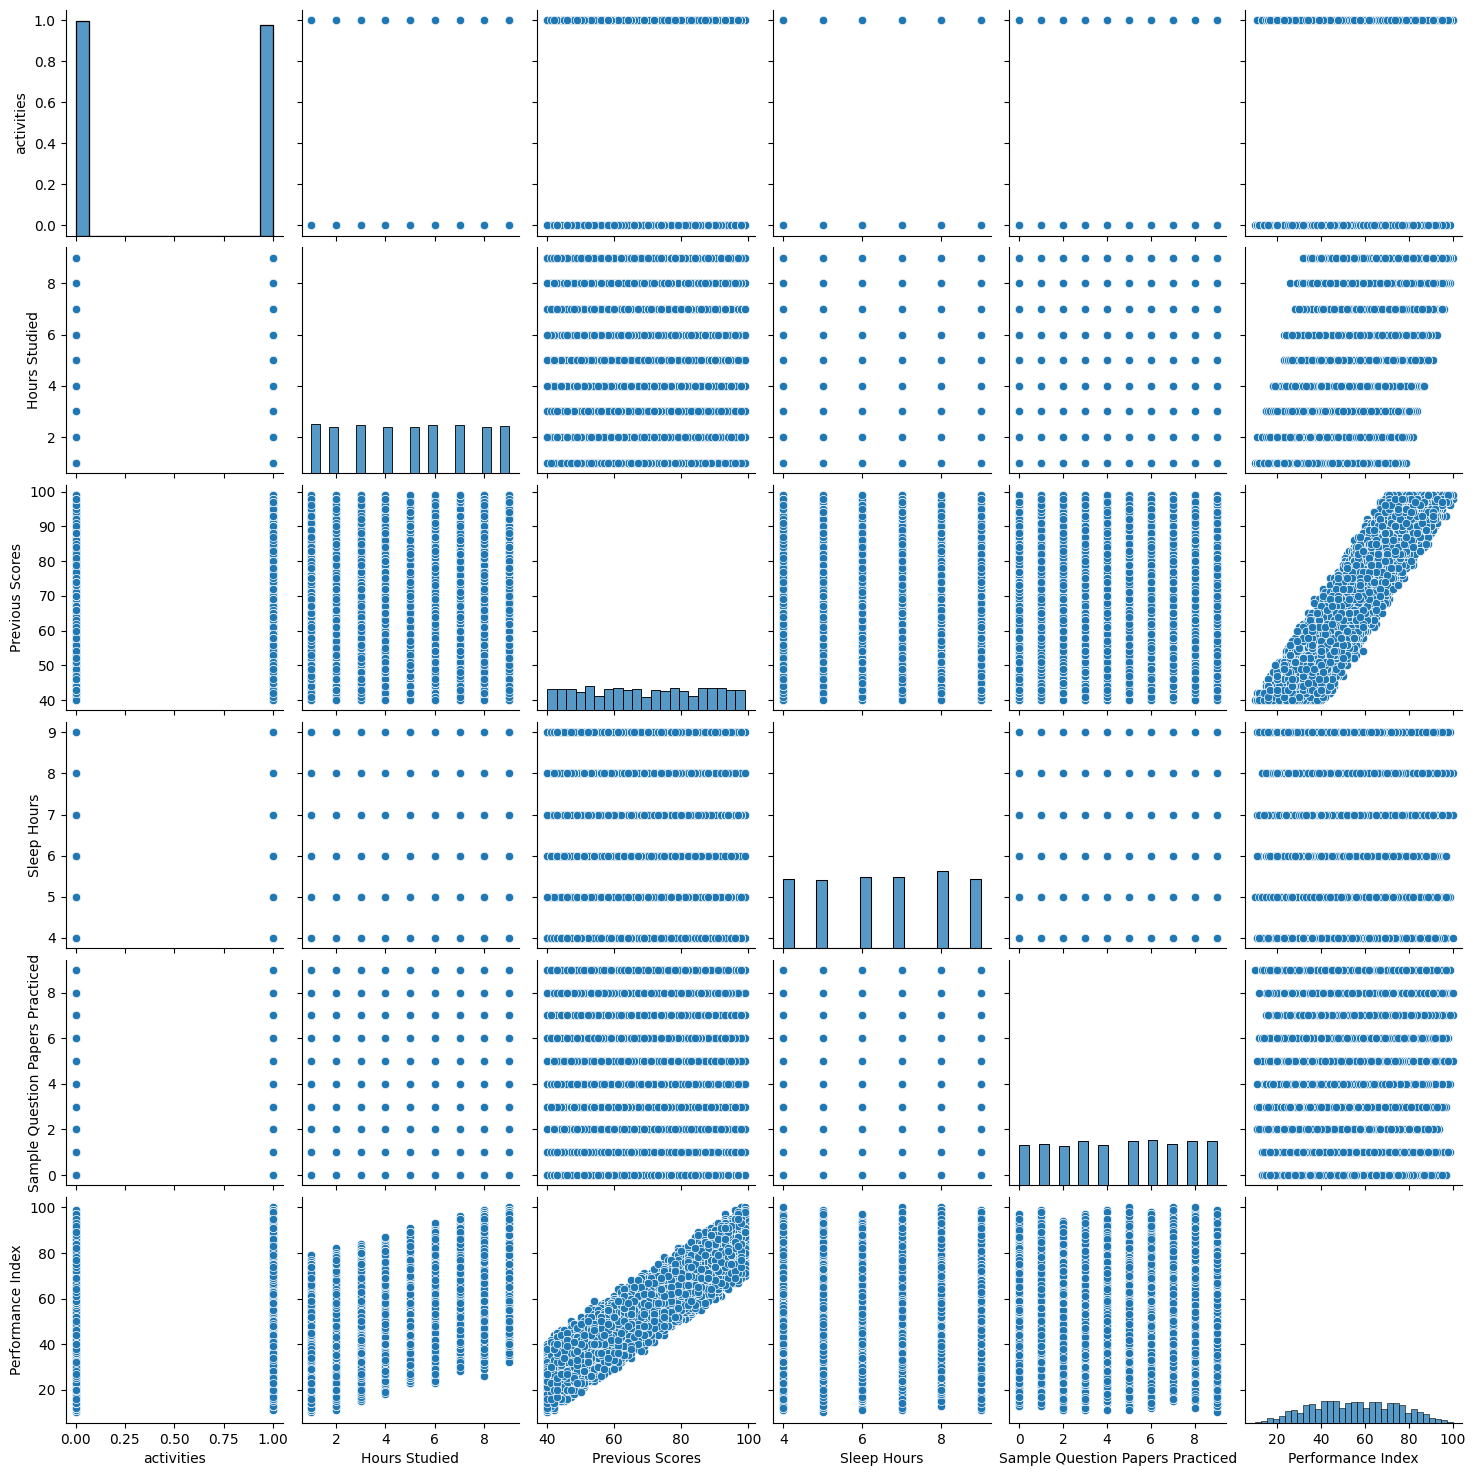

In [136]:
sns.pairplot(data)
plt.show()

# Détecter les Valeurs Aberrantes 

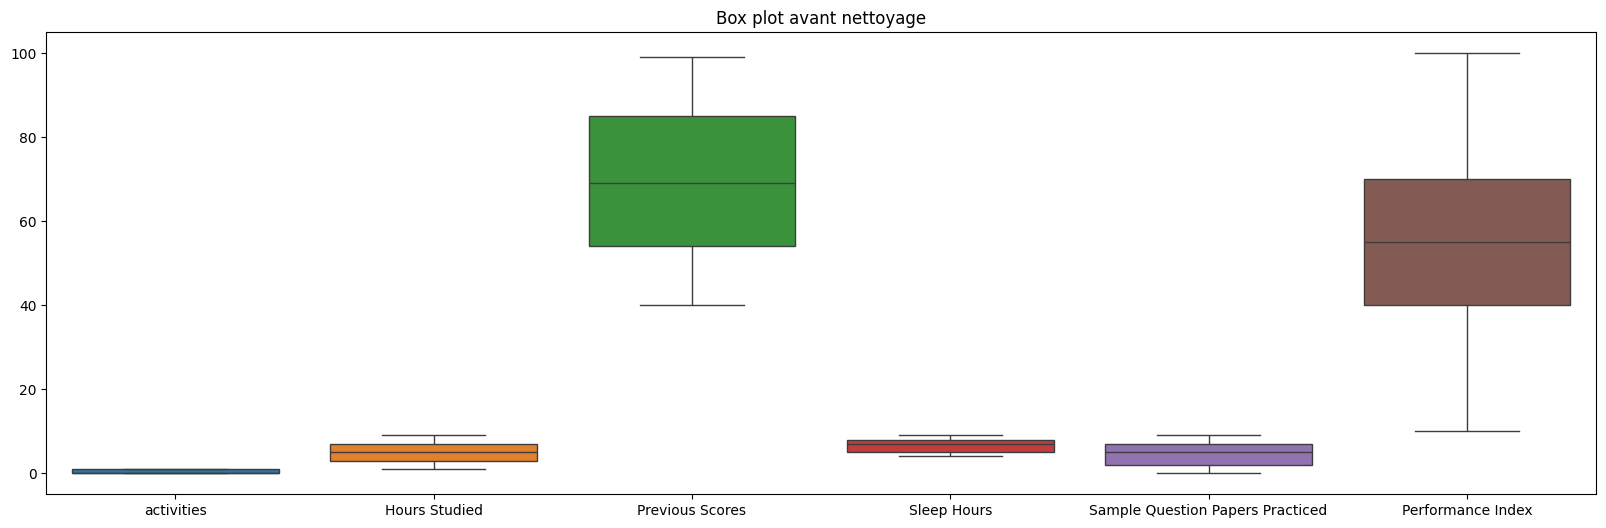

In [139]:
#Box Plot
plt.figure(figsize=(20, 6))
sns.boxplot(data=data)
plt.title("Box plot avant nettoyage")
plt.show()

In [145]:
# Z_score
outliers = []
def detecter_outliers(data,threshold):
    mean = np.mean(data)
    std = np.std(data)
    for i in data : 
        z_score = (i-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(i) 
    return outliers
            
    


In [146]:
detecter_outliers(data['Previous Scores'],2)

[]

In [66]:
for column in data.select_dtypes(include=[np.number]).columns:
    skewness_per_column = data[column].skew()
    print(f"skewness for {column}: {skewness_per_column}")

skewness for activities: 0.020058750569044215
skewness for Hours Studied: -0.0033483737916364534
skewness for Previous Scores: 0.0055813419610842956
skewness for Sleep Hours: -0.04134960099660273
skewness for Sample Question Papers Practiced: -0.034893124735861716
skewness for Performance Index: -0.00041186196091178305


<Axes: xlabel='Previous Scores'>

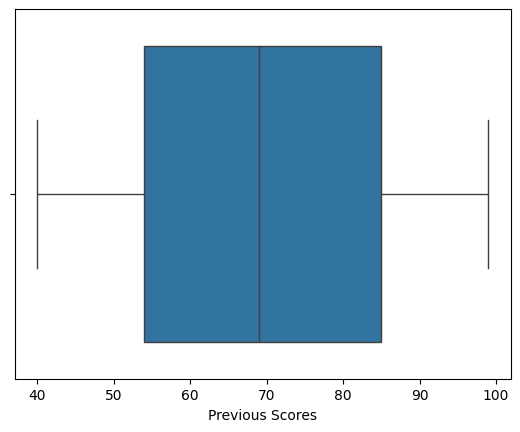

In [68]:
sns.boxplot(x=data['Previous Scores'])

In [16]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]


In [113]:
X.drop(columns=(['Sleep Hours','Sample Question Papers Practiced','activities']),inplace=True)

In [17]:
X

,activities,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
0,1,7,99,9,1
1,0,4,82,4,2
2,1,8,51,7,2
3,1,5,52,5,2
4,0,7,75,8,5
...,...,...,...,...,...
9995,1,1,49,4,2
9996,1,7,64,8,5
9997,1,6,83,8,5
9998,1,9,97,7,0


In [18]:
from sklearn.model_selection import train_test_split


# Séparer en ensemble d'entraînement et de test
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state = 16)


In [19]:
# Dictionnaire avec plusieurs modèles
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'Random Forest Regressor': RandomForestRegressor(),
    'Gradient Boosting Regressor': GradientBoostingRegressor(),
    'SVR (Support Vector Regressor)': SVR(),
    'K-Nearest Neighbors Regressor': KNeighborsRegressor(),
    'XGB Regressor': XGBRegressor()
}


In [23]:
# Entraînement et évaluation des modèles
train_scores = {}
test_scores = {}

for key, val in models.items():
    print(f"Training {key} model")
    mod = val.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    
    print(f"R2 Score: {r2_score(y_test, y_pred)}")  
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
    print('*****************************')


Training Linear Regression model
R2 Score: 0.9880068657493418
Mean Absolute Error: 1.66884077963931
*****************************
Training Ridge Regression model
R2 Score: 0.9880068531031578
Mean Absolute Error: 1.6688441382077683
*****************************
Training Lasso Regression model
R2 Score: 0.9860243460242528
Mean Absolute Error: 1.8063220789102927
*****************************
Training Decision Tree Regressor model
R2 Score: 0.9739252876354767
Mean Absolute Error: 2.469873417721519
*****************************
Training Random Forest Regressor model
R2 Score: 0.9840760912560563
Mean Absolute Error: 1.930014591119148
*****************************
Training Gradient Boosting Regressor model
R2 Score: 0.9872997558619659
Mean Absolute Error: 1.7167805140165096
*****************************
Training SVR (Support Vector Regressor) model
R2 Score: 0.9847062860332839
Mean Absolute Error: 1.8766728520826599
*****************************
Training K-Nearest Neighbors Regressor model
R2

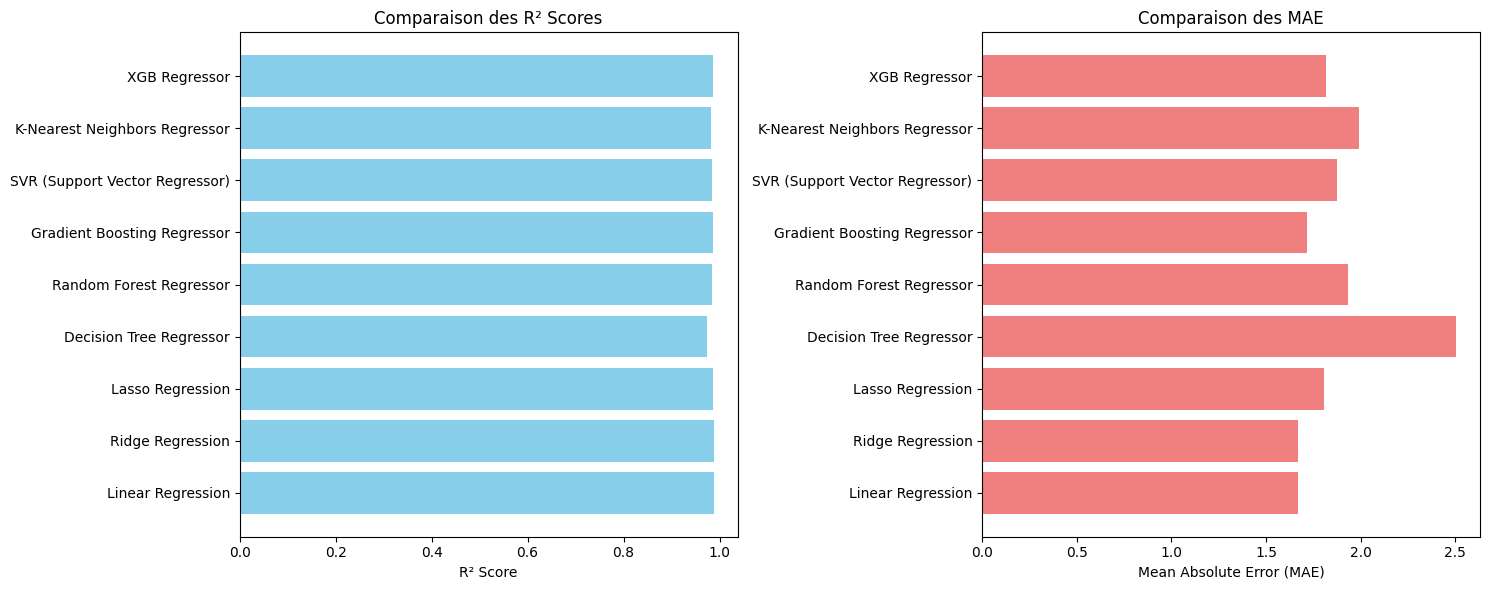

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_absolute_error

# Dictionnaire pour stocker les résultats
r2_scores = []
mae_scores = []
model_names = []

# Entraînement et évaluation des modèles
for key, val in models.items():
    mod = val.fit(X_train, y_train)
    y_pred = mod.predict(X_test)
    
    # Calcul des scores R² et MAE
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Stockage des résultats
    model_names.append(key)
    r2_scores.append(r2)
    mae_scores.append(mae)

# Création des graphiques

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Graphique pour le R²
axes[0].barh(model_names, r2_scores, color='skyblue')
axes[0].set_xlabel('R² Score')
axes[0].set_title('Comparaison des R² Scores')

# Graphique pour l'erreur absolue moyenne (MAE)
axes[1].barh(model_names, mae_scores, color='lightcoral')
axes[1].set_xlabel('Mean Absolute Error (MAE)')
axes[1].set_title('Comparaison des MAE')

plt.tight_layout()
plt.show()


In [171]:
print("Train R² Scores: ", train_scores)
print("Test R² Scores: ", test_scores)

Train R² Scores:  {'Linear Regression': 0.9868511965240864, 'Ridge Regression': 0.9868511965240864, 'Lasso Regression': 0.9868511965240864, 'Decision Tree Regressor': 0.9868511965240864, 'Random Forest Regressor': 0.9868511965240864, 'Gradient Boosting Regressor': 0.9868511965240864, 'SVR (Support Vector Regressor)': 0.9868511965240864, 'K-Nearest Neighbors Regressor': 0.9868511965240864, 'XGB Regressor': 0.9868511965240864}
Test R² Scores:  {'Linear Regression': 0.9840059847828334, 'Ridge Regression': 0.9840059847828334, 'Lasso Regression': 0.9840059847828334, 'Decision Tree Regressor': 0.9840059847828334, 'Random Forest Regressor': 0.9840059847828334, 'Gradient Boosting Regressor': 0.9840059847828334, 'SVR (Support Vector Regressor)': 0.9840059847828334, 'K-Nearest Neighbors Regressor': 0.9840059847828334, 'XGB Regressor': 0.9840059847828334}


# new phases

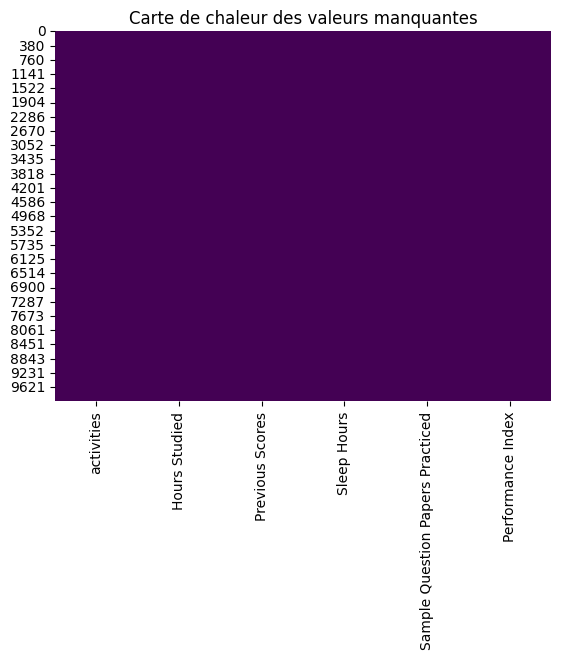

In [24]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title("Carte de chaleur des valeurs manquantes")
plt.show()

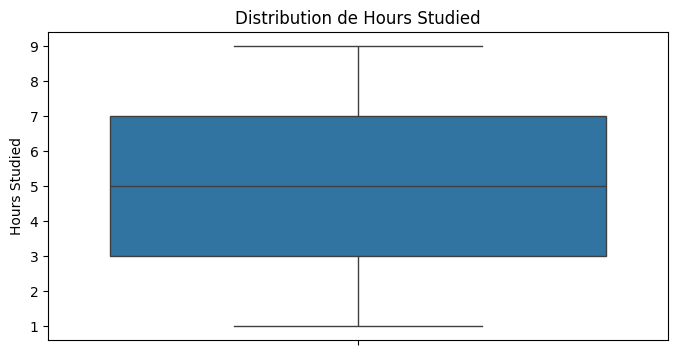

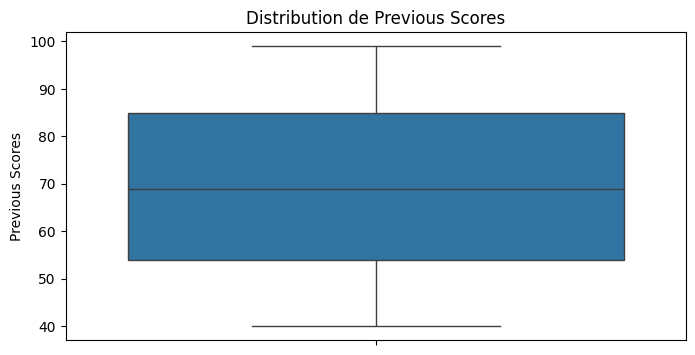

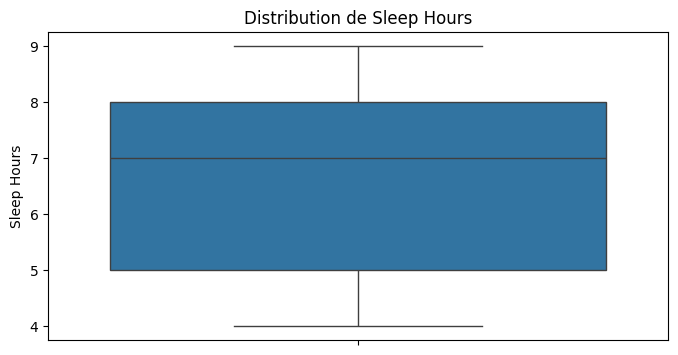

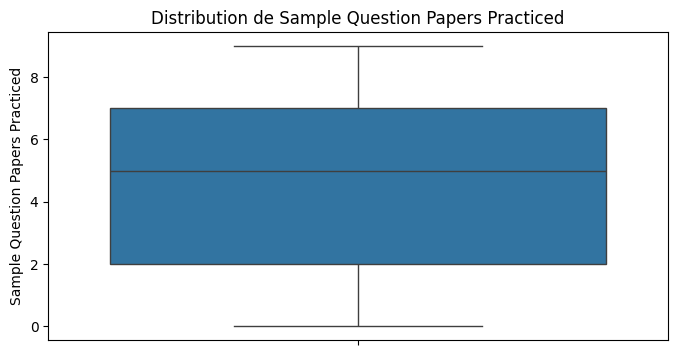

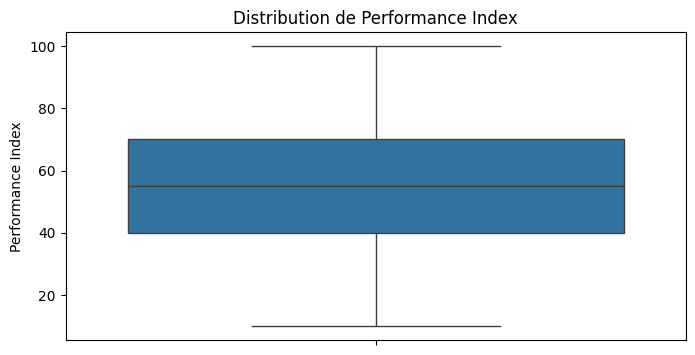

In [25]:
for col in data.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f"Distribution de {col}")
    plt.show()


In [26]:
models = {
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve, GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
print("\nValidation croisée des modèles :")
for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='r2')
    print(f"{name} - R² moyen : {scores.mean():.4f}")



Validation croisée des modèles :
Ridge Regression - R² moyen : 0.9888
Lasso Regression - R² moyen : 0.9887
Random Forest - R² moyen : 0.9850


In [29]:
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, scoring='r2', n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label="Score d'entraînement")
    plt.plot(train_sizes, test_scores_mean, label="Score de validation")
    plt.title(title)
    plt.xlabel("Taille de l'ensemble d'entraînement")
    plt.ylabel("Score R²")
    plt.legend()
    plt.grid()
    plt.show()

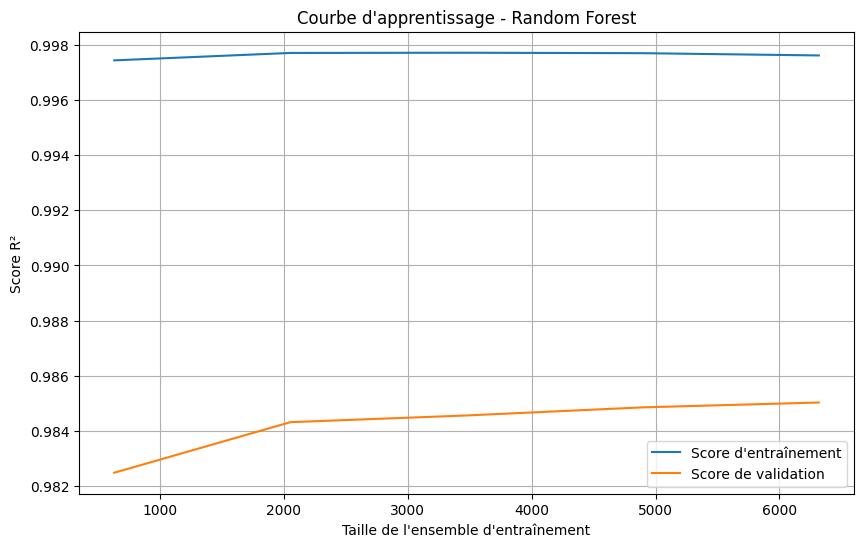

In [30]:
plot_learning_curve(RandomForestRegressor(n_estimators=100, random_state=42), X_train, y_train, "Courbe d'apprentissage - Random Forest")


In [31]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("\nVariance expliquée par composante PCA :")
print(pca.explained_variance_ratio_)


Variance expliquée par composante PCA :
[9.43403855e-01 2.56785016e-02 2.11214124e-02 9.01441142e-03
 7.81819702e-04]


In [32]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_pca, y_train)
y_pred = model.predict(X_test_pca)

In [33]:
print("\nÉvaluation du modèle PCA :")
print(f"R² : {r2_score(y_test, y_pred):.4f}")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.4f}")


Évaluation du modèle PCA :
R² : 0.9847
MAE : 1.9006


In [34]:
print("\nOptimisation des hyperparamètres avec GridSearchCV...")
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("\nMeilleurs paramètres :")
print(grid_search.best_params_)



Optimisation des hyperparamètres avec GridSearchCV...

Meilleurs paramètres :
{'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 150}


In [35]:
optimized_model = grid_search.best_estimator_
y_optimized_pred = optimized_model.predict(X_test)
print(f"R² optimisé : {r2_score(y_test, y_optimized_pred):.4f}")
print(f"MAE optimisé : {mean_absolute_error(y_test, y_optimized_pred):.4f}")

R² optimisé : 0.9859
MAE optimisé : 1.8166


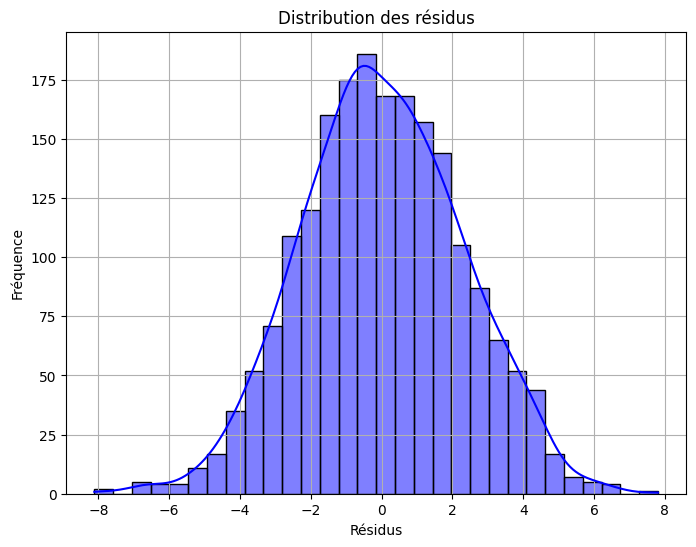

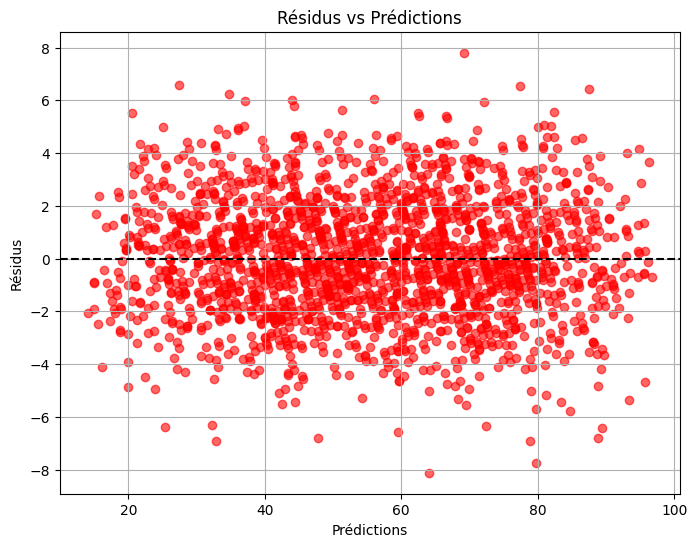

In [36]:
residuals = y_test - y_optimized_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title("Distribution des résidus")
plt.xlabel("Résidus")
plt.ylabel("Fréquence")
plt.grid()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_optimized_pred, residuals, alpha=0.6, color='red')
plt.axhline(0, linestyle='--', color='black')
plt.title("Résidus vs Prédictions")
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.grid()
plt.show()